In [ ]:
import pandas as pd

df  = pd.read_csv('https://raw.githubusercontent.com/jingjayy/test/main/drugsComTrain_raw.csv?token=GHSAT0AAAAAACVSNVG7BWLHZPAGFRINCRKQZV4HR5A')
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# creating wordclouds
def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color = 'black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))

    # plot the WordCloud image
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=30)
    plt.show()

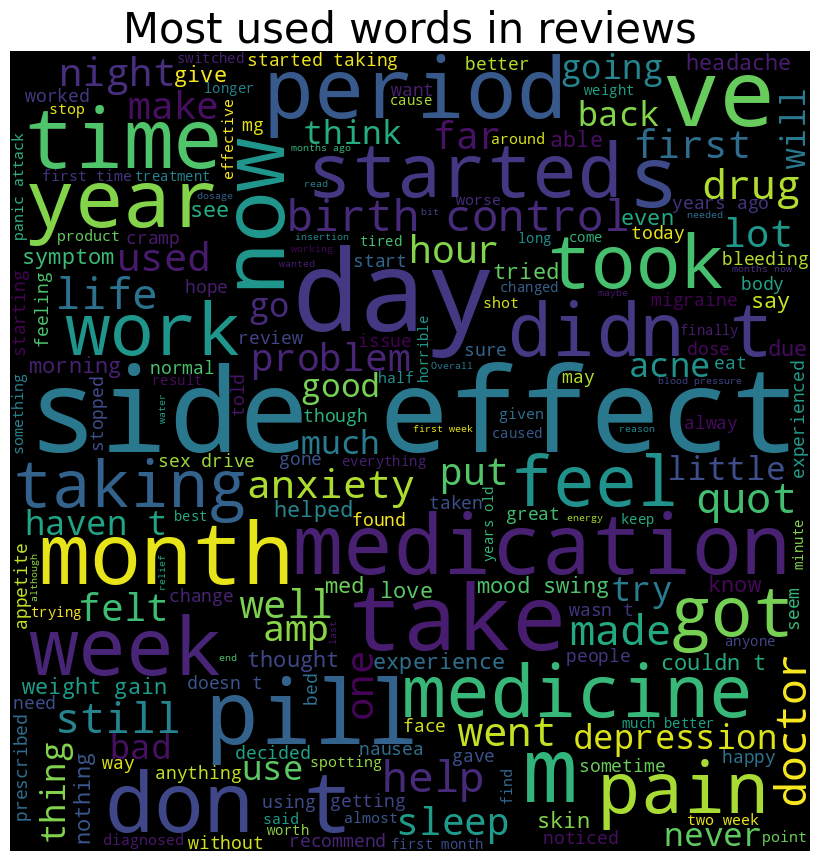

In [ ]:
wordcloud_generator(df['review'], title="Most used words in reviews")

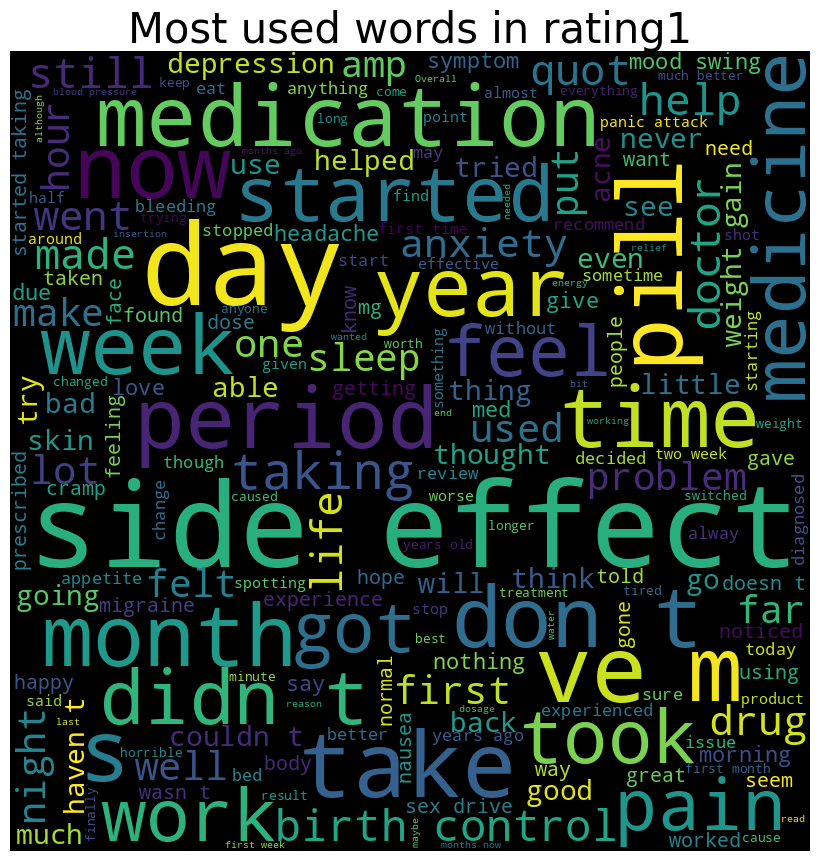

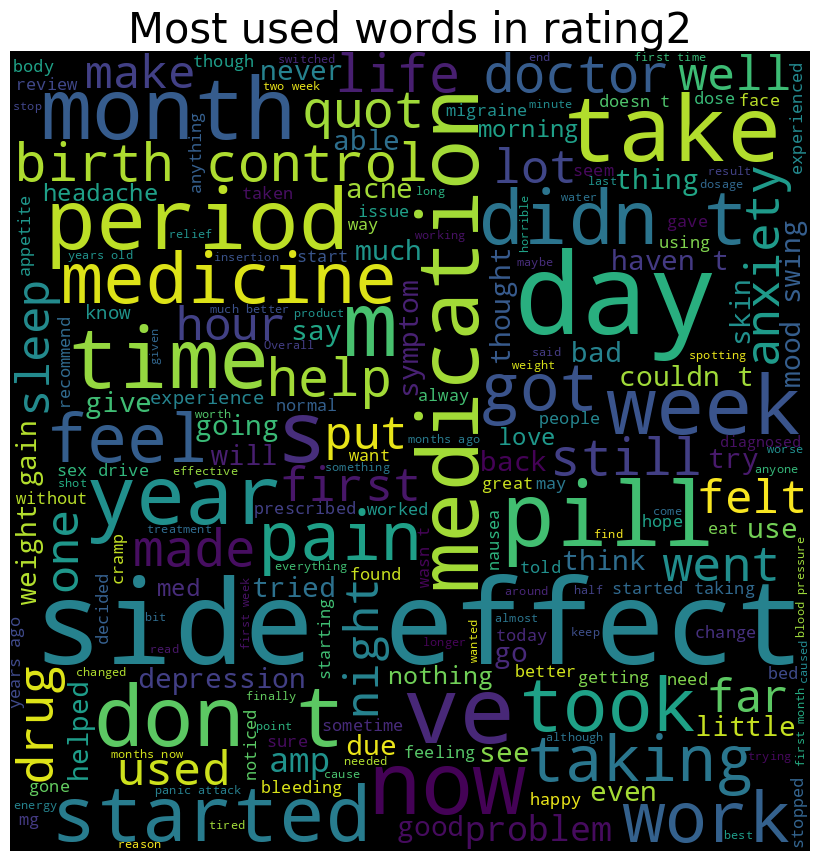

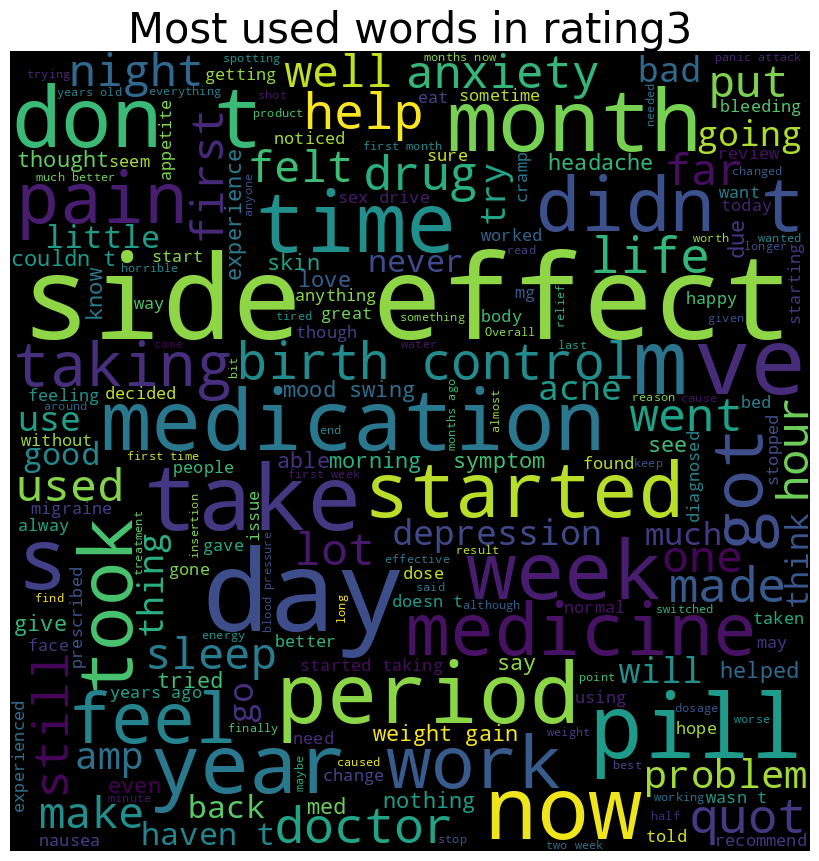

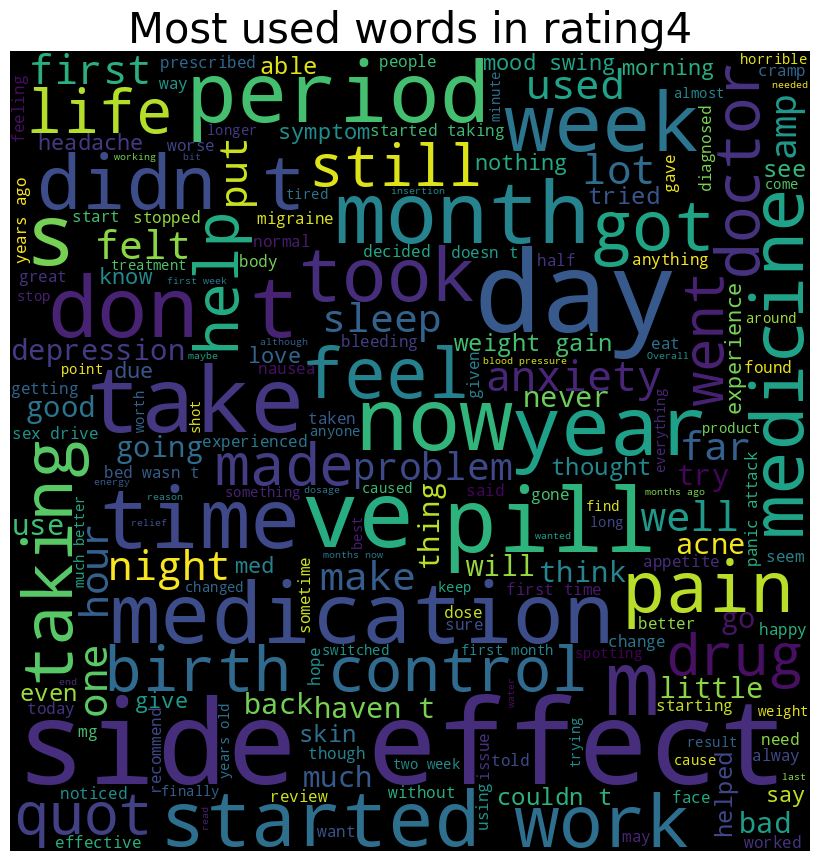

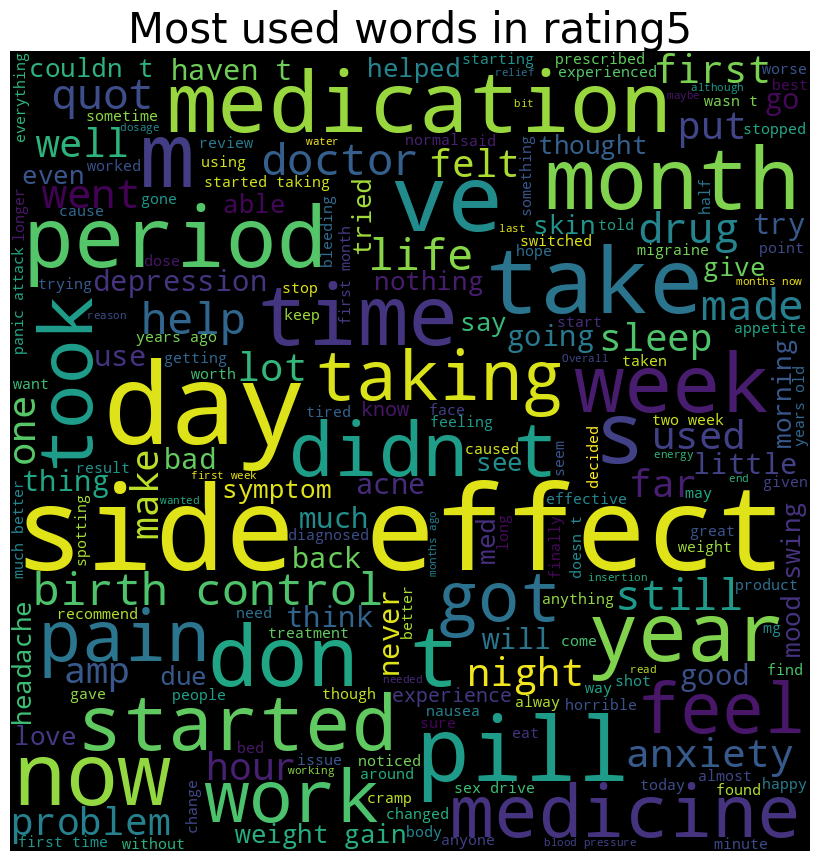

In [ ]:
# give the most commonly used word for each rating from 1 to 5
for rating in range(1,6):
  reviews = df[df['rating'] == rating]
  wordcloud_generator(df['review'], title="Most used words in rating" + str(rating))

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to remove special characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the reviews
df['clean_review'] = df['review'].apply(remove_special_characters)

print(df.columns)

# TF-IDF Vectorization using the cleaned reviews
tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df['clean_review'])

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'clean_review'],
      dtype='object')


In [ ]:
df.drop(columns=['review'], inplace=True)

In [ ]:
# Query Transformation and Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
query = "drugName"
queryTFIDF = tfidf.transform([query])

In [ ]:
# give me the top 100  results
cosims = cosine_similarity(queryTFIDF, feature)
results = cosims.argsort()[:-101:-1]
print(results)

[[     0 107527 107528 ...  53768  53761 161296]]


In [ ]:
for r in results:
  print(df.iloc[r]['clean_review'])
  print("----")

0         It has no side effect I take it in combination...
107527    Was prescribed lortab for alot of dental work ...
107528    I039m very grateful the FDA approved this I039...
107529    I was in a very severe auto accident where I w...
107530    Helped me with alcohol opioid and Adderall add...
                                ...                        
53766     So far I039m still in the beginning stages of ...
53767     I just started 25 mg on 24th 3 days ago I knew...
53768     Within the first 35 months of taking this pill...
53761     I have suffered with post surgery heart valve ...
161296    I039ve had chronic constipation all my adult l...
Name: clean_review, Length: 161297, dtype: object
----


In [ ]:
# sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['clean_review']]
df['Sentiments'] = sentiments
df.head(100)

,uniqueID,drugName,condition,rating,date,usefulCount,clean_review,Sentiments
0,206461,Valsartan,Left Ventricular Dysfunction,9,20-May-12,27,It has no side effect I take it in combination...,-0.2960
1,95260,Guanfacine,ADHD,8,27-Apr-10,192,My son is halfway through his fourth week of I...,0.9172
2,92703,Lybrel,Birth Control,5,14-Dec-09,17,I used to take another oral contraceptive whic...,0.6160
3,138000,Ortho Evra,Birth Control,8,3-Nov-15,10,This is my first time using any form of birth ...,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,9,27-Nov-16,37,Suboxone has completely turned my life around ...,0.9403
...,...,...,...,...,...,...,...,...
95,45237,Fluoxetine,Major Depressive Disorde,2,12-Jan-16,18,I started Prozac as one of my first anti depre...,-0.9823
96,102810,Aripiprazole,Depression,4,17-Aug-12,33,Intake Effexor XR 375 mg and lorazepam for dep...,0.3190
97,60280,NuvaRing,Birth Control,5,31-Oct-11,0,I am torn by the Nuvaring The convenience is g...,0.1643
98,10677,Spironolactone,Acne,9,21-Aug-13,31,I039m 30 years old I started having really ba...,0.8574


In [ ]:
pd.set_option('display.max_colwidth', None)
df[(df['rating'] < 5) & (df['Sentiments'] < 0)].sort_values("Sentiments")[0:20]

,uniqueID,drugName,condition,rating,date,usefulCount,clean_review,Sentiments
104432,137103,Isotretinoin,Acne,1,7-Feb-16,5,So I have cystic acne I don039t break out alot bUT any pimple I do get scars on my face and does not go away I had tried almost everything from prescription creams neostrata proactive to minocycline amd doxycycline but none of it did anything and I had terrible reaction to alot of the creams and pills\r\nI had been prescribed accutane years ago and read all the side effecst and threw it in the garbage but after talking to a couple doctors and trying almost everything I could think of I decided I would give it a shot I had tried everything else and the reviews were pretty promising \r\nThe first 10 days I had the chapped lips that never stopped and my skin was inflamed to the point it looked like I had a sunburn The fact that I work in a potash plant didn039t help matters Was like have salt thrown on your wounds and having to wear a respirator was unbearable Fortunately I had holidays for the next 10 days and being away from work made it easier My job is very physical so already I wasn039t sure this would work I noticed I started to get a bit depressed which I knew was a side effect but grew increasingly more concerned when I read it can potentially be a permanent side effect even after discontinued use 3 weeks in I started to get chest pain and it was bad it would come and go and that bothered the hell out of me the first time I didn039t worry about it but then it happened again and much worse I became very concerned for my heart and stopped taking the pills all together At that point I was only 3 weeks in and was just hoping I would be ok After stopping I still had chest pain a few days off and on Then the other pains started with my back and my feet At this point I was at work and it was killing me Especially my feet They hurt so bad I wouldn039t leave the couch when I got home after work and I would just hurt to the point of tears Painkillers did nothing for me which was highly unusual I started to do some research about the foot pain and some of the reviews I came across scared the hell out of me People that had taken accutane only a short few weeks like myself and been in pain constantly ever since Others who had taken it and could no longer work or do anything This became terrifying for me as I had not considered that 3 weeks of accutane could possibly cause me horrid pain the rest of my life With all the pain and fear I also became increasingly depressed I spent a lot of time hating on myself and the reviews I read on they were equally terrifying \r\nI was so scared that this was the worst thing I had ever done to myself\r\nDid I mention you absolutely should never drink on accutane I was on holidays and had one drink and instantly regretted it Was in bed the rest of the night\r\nAfter a month of all this since I had stopped the pills the pain finally went away and I have never been so grateful I hoped everyday that the constant pain would not be a permanent thing and fortunately I got very likely\r\nAlso would like to add that none of my acne cleared up not that I was surprised But I now no longer care That was the stupidity thing I ever did in thinking that I would not be affected by the horrible side effects of accutane No one thinks it will happen to them but obviously it happens to some people or they wouldn039t be listed as side effects and these bad reviews wouldn039t exist \r\nTo those of you still suffering I hope that your pains go away I got Lucky and for that I am thankful\r\nIf you are thinking about taking it I wish you the best of luck I only lasted 3 weeks and even then if I could go back and not take them I so would,-0.9984
110081,35213,Levofloxacin,Bladder Infection,2,17-Nov-15,2,Well I picked bladder but the reason I am on is for Diverticulitis I was given this med while in hospital 2 doses before sleep After first dose the next day I told them I felt like I had the fluall my joint

In [ ]:
df[(df['rating'] > 5) & (df['Sentiments'] > 0)].sort_values("Sentiments")[0:20]

,uniqueID,drugName,condition,rating,date,usefulCount,clean_review,Sentiments
30607,130153,Levonorgestrel,Emergency Contraception,10,8-Aug-14,23,This pill works Don039t read these reviews 24 hrs a day like I did I was so scared and worried myself sick but it works I was on birth control but didn039t take it at the same times wasn039t using as contraception more to regulate periods Period ended June 22nd Incident on night June 24th took pill June 25th 5 hrs after incident Withdrawal bleeding July 18 Regular period was supposed to come July 13 I got it one day early on the 12th So basically two weeks of bleeding in a month Even after that it was heavy but I was worried about implantation and all that But I got my next period August 8th and it is two days early according to my birth control packet but right on time if I counted 28 day cycle THIS WORKS TRUST IT,0.0004
88780,108886,Nexplanon,Birth Control,9,12-Jul-17,1,Had this in since Nov 2014 Period disappeared for 3 mo amp then it switched back amp forth between every 2 weeks to every 2 mo I039ve never been really good at thinking about when to expect it so this was more or less businessasusual Physically Yes I did gain weight but this just motivated to me to dedicate time to exercise Not the worst outcome Emotionally I didn039t notice much of a change for the 1st yr but then the 2nd yr I felt emotionally out of control I039ve always been lactoseintolerant but never fully committed to a dairyfree diet I finally did in that yr as I was reading papers that eating dairy can actually worsen symptoms of depression Avoiding dairy all together fixed the issues amp have been happy ever since,0.0004
43549,142962,Etonogestrel,Birth Control,9,12-Jul-17,1,Had this in since Nov 2014 Period disappeared for 3 mo amp then it switched back amp forth between every 2 weeks to every 2 mo I039ve never been really good at thinking about when to expect it so this was more or less businessasusual Physically Yes I did gain weight but this just motivated to me to dedicate time to exercise Not the worst outcome Emotionally I didn039t notice much of a change for the 1st yr but then the 2nd yr I felt emotionally out of control I039ve always been lactoseintolerant but never fully committed to a dairyfree diet I finally did in that yr as I was reading papers that eating dairy can actually worsen symptoms of depression Avoiding dairy all together fixed the issues amp have been happy ever since,0.0004
113616,68336,Plan B,Emergency Contraception,10,8-Aug-14,23,This pill works Don039t read these reviews 24 hrs a day like I did I was so scared and worried myself sick but it works I was on birth control but didn039t take it at the same times wasn039t using as contraception more to regulate periods Period ended June 22nd Incident on night June 24th took pill June 25th 5 hrs after incident Withdrawal bleeding July 18 Regular period was supposed to come July 13 I got it one day early on the 12th So basically two weeks of bleeding in a month Even after that it was heavy but I was worried about implantation and all that But I got my next period August 8th and it is two days early according to my birth control packet but right on time if I counted 28 day cycle THIS WORKS TRUST IT,0.0004
73061,10773,Mononessa,Birth Control,8,7-Jan-17,0,I039ve been taking it for a good while now the first three months I was dizzy nausea and moody But after those initial months that has stoppedPros I had bad acne and it has helped clear it up periods are less painful cons I have gained a few pounds and am constantly craving food my sex drive is substantial lower May be trying another brand soon because of this I recommend setting an alarm on phone to remember to take it mines for 10 that039s way if there039s a chance I039ll be out late it039s with me and taking it won039t interfere with my day to day activities,0.0005
105872,84315,Ethinyl estradiol / norgestimate,Birth Control,8,7-Jan-17,0,I039ve been taking it for a good while now the firs

In [ ]:
df[(df['rating'] == 5) & (df['Sentiments'] == 0)].sort_values("Sentiments")[0:20]

,uniqueID,drugName,condition,rating,date,usefulCount,clean_review,Sentiments
1765,186466,Desvenlafaxine,Depression,5,13-Dec-10,6,I am on my third day of taking 50mg of Pristiq after 12 years of taking 150mg of EffexorXR every morning I have had my depression and anxiety under control for the last 11 12 years because of therapy family support and the EffexorXR My main reason for trying Pristiq which is very similar to Effexor is to try to lessen the amount of time it takes to achieve orgasm quotIt takes foreverquot My doctor seems to think this will help We039ll see,-0.0
105147,24923,Compazine,Hiccups,5,20-Dec-14,6,I actually had this right in front of me while I was smoking a cigarette and my hiccups went away,0.0
105614,51197,Azithromycin,Sinusitis,5,31-Jan-16,5,Extreme diarrhea first and second day Just getting started for 7 days,0.0
105719,125670,Flagyl,Bacterial Infection,5,18-Oct-16,4,As expected,0.0
107255,92766,Vortioxetine,Depression,5,12-Oct-17,5,10 mg\r\nSide effects I039m having abnormal dreams and night sweats \r\nNo benefits Still hungry and sad,0.0
108172,17393,Dyanavel XR,ADHD,5,14-Feb-17,5,Now my 10 years old son is on 55mg liquid of Dyanavel xr and it last 5 hours,0.0
112806,161523,Diphenhydramine,Urticaria,5,10-Dec-08,7,Benadryl made my 16yr old so sleepy that he had to be sent home from school but it did take away his hives,0.0
112958,218028,Azilsartan medoxomil / chlorthalidone,High Blood Pressure,5,16-Jun-16,0,overheating,0.0
113863,39538,Contrave,Weight Loss,5,30-Jun-16,3,Started 62216 weight 165lbs so far slight nausea but able to continue my goal is 135,0.0
116325,40685,Darifenacin,Urinary Incontinence,5,6-Mar-13,8,My fatherinlaw took this medication and it gave him alot of extra pyramidal movements and Tardive Dyskinesia,0.0
